## Sistema de Recomendações

O conjunto de dados que utilizaremos é o do Movielens, um [site pertencente ao Grouplens](https://grouplens.org/datasets/movielens/latest/) que tem um sistema de avaliação de vários filmes - ou seja, as pessoas podem dar notas de alguma maneira e encontrar outros filmes que lhes interessam, tudo muito ligado à questão de recomendação.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

In [2]:
# Configuração do pandas para apresentar no máximo 15 linhas de um dataframe
pd.set_option('display.max_rows',15)

# Configuração do pandas para apresentar no máximo 15 colunas de um dataframe
pd.set_option('display.max_columns',15)

#### Leitura dos dados movielens

In [3]:
df_movies = pd.read_csv('ml-latest-small/movies.csv', names=['FilmeID', 'Titulo', 'Genero'], index_col='FilmeID', header=1)
df_movies.head()

,Titulo,Genero
FilmeID,,
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
6,Heat (1995),Action|Crime|Thriller


In [4]:
df_ratings = pd.read_csv('ml-latest-small/ratings.csv', names=['UsuarioID', 'FilmeID', 'Nota', 'Timestamp'], index_col='UsuarioID', header=1)
df_ratings.head()

,FilmeID,Nota,Timestamp
UsuarioID,,,
1,3,4.0,964981247
1,6,4.0,964982224
1,47,5.0,964983815
1,50,5.0,964982931
1,70,3.0,964982400


### Explorando os dados

In [5]:
df_movies.describe()

,Titulo,Genero
count,9741,9741
unique,9736,951
top,Emma (1996),Drama
freq,2,1053


In [6]:
df_ratings.describe()

,FilmeID,Nota,Timestamp
count,100835.000000,100835.000000,1.008350e+05
mean,19435.488451,3.501552,1.205948e+09
std,35531.110673,1.042533,2.162608e+08
min,1.000000,0.500000,8.281246e+08
25%,1199.000000,3.000000,1.019124e+09
50%,2991.000000,3.500000,1.186087e+09
75%,8123.000000,4.000000,1.435994e+09
max,193609.000000,5.000000,1.537799e+09


### Primeira Tentativa de Recomendação
Primeiramente podemos recomendar os filmes mais populares, esse levantamento pode ser feito a partir da base de dados df_ratings, levantando os filmes mais avaliados (supondo que sejam os filmes mais assistidos).

In [7]:
df_movies['Total_de_Votos'] = df_ratings.FilmeID.value_counts()

In [8]:
df_movies.head()

,Titulo,Genero,Total_de_Votos
FilmeID,,,
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0
6,Heat (1995),Action|Crime|Thriller,102.0


In [9]:
df_movies.sort_values('Total_de_Votos', ascending=False).head()

,Titulo,Genero,Total_de_Votos
FilmeID,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


Recomendações a partir da nota média do filme

In [10]:
df_movies['Nota_Média'] = df_ratings[['FilmeID', 'Nota']].groupby('FilmeID').mean()

In [11]:
df_movies.sort_values('Total_de_Votos', ascending=False).head(10)

,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


 Ordenar os filmes pelos mais populares em votos não necessariamente irá implicar naqueles que as pessoas mais gostaram. Vamos mudar o rankin listando os filmes com maiores médias.

In [12]:
df_movies.sort_values('Nota_Média', ascending=False).head(10)

,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,
142020,Oscar (1967),Comedy,1.0,5.0
93008,"Very Potter Sequel, A (2010)",Comedy|Musical,1.0,5.0
163112,Winnie the Pooh Goes Visiting (1971),Animation,1.0,5.0
163386,Winnie the Pooh and the Day of Concern (1972),Animation,1.0,5.0
132333,Seve (2014),Documentary|Drama,1.0,5.0
163925,"Wings, Legs and Tails (1986)",Animation|Comedy,1.0,5.0
132153,Buzzard (2015),Comedy|Drama|Horror,1.0,5.0
5607,"Son of the Bride (Hijo de la novia, El) (2001)",Comedy|Drama,1.0,5.0
26587,"Decalogue, The (Dekalog) (1989)",Crime|Drama|Romance,1.0,5.0


Repare que todos eles têm média 5... mas também têm um total de votos 1, são filmes desconhecidos. Vamos mudar nossa heurística para os filmes com mais de 50 votos.

In [13]:
df_movies.query('Total_de_Votos > 50').sort_values('Nota_Média', ascending=False).head(10)

,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


### Aperfeiçoando nossas recomendações
Até agora as recomendações foram feitas sem levar em conta as preferencias do usuário, vamos visualisar os filme avaliados pelo usuário 320, por exemplo, para entender as preferencias dele e fazer recomendações mais acertivas.

In [14]:
filmes_usuario_320 = df_ratings.loc[320]['FilmeID']

df_movies.loc[filmes_usuario_320]

,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,
1013,"Parent Trap, The (1961)",Children|Comedy|Romance,12.0,3.208333
2058,"Negotiator, The (1998)",Action|Crime|Drama|Mystery|Thriller,30.0,3.350000
3404,Titanic (1953),Action|Drama,6.0,3.583333
3534,28 Days (2000),Drama,25.0,3.300000
3578,Gladiator (2000),Action|Adventure|Drama,170.0,3.938235
...,...,...,...,...
59900,You Don't Mess with the Zohan (2008),Comedy,15.0,2.866667
62999,Madagascar: Escape 2 Africa (2008),Action|Adventure|Animation|Children|Comedy|IMAX,13.0,3.692308
68358,Star Trek (2009),Action|Adventure|Sci-Fi|IMAX,59.0,3.864407


O último filme assistido foi Avatar. Podemos criar uma nova heurística recomendando os filmes:
* Com os mesmos gêneros - "Action|Adventure|Sci-Fi|IMAX";</br>
* Melhores avaliados;</br>
* Com mais de 50 votos;</br>
* Que ainda não tenha assistido.

In [15]:
recomendacoe_usuario_320 = df_movies.query('Total_de_Votos > 50 and Genero == "Action|Adventure|Sci-Fi|IMAX"').sort_values('Nota_Média', ascending=False).head(10)

recomendacoe_usuario_320.drop(filmes_usuario_320, errors='ignore')

,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,
89745,"Avengers, The (2012)",Action|Adventure|Sci-Fi|IMAX,69.0,3.869565
8636,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
5378,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609


### Procurando usuários "similares"
A similaridade será mensurada a partir das distâncias das notas dos usuário. Sendo que se João atribuiu 5 a nota do filme estará mais próximo de Maria que atribuiu 4 do que José que atribuiu a nota 3 ao mesmo filme.</br></br>
Atenção:
* A distância entre uma nota e outra é calculada a partir do módulo da subtração entre as notas;
* A distância entre duas notas de um usuário e outras duas notas de outro usuário é calculado a partir do cálculo de hipotenusa do triângulo, com a fórmula de pitágoras;
* A distância entre mais notas utiilzamos a mesma fórmula de pitágora e costumamos chamar de distância euclidiana.


##### Distância entre uma nota e outra

In [16]:
joao = 5
maria = 4
jose = 3

print(f'Distância entre João e Maria é de {joao - maria}')
print(f'Distância entre João e José é de {joao - jose}')

Distância entre João e Maria é de 1
Distância entre João e José é de 2


##### Distância entre duas notas e outras duas notas

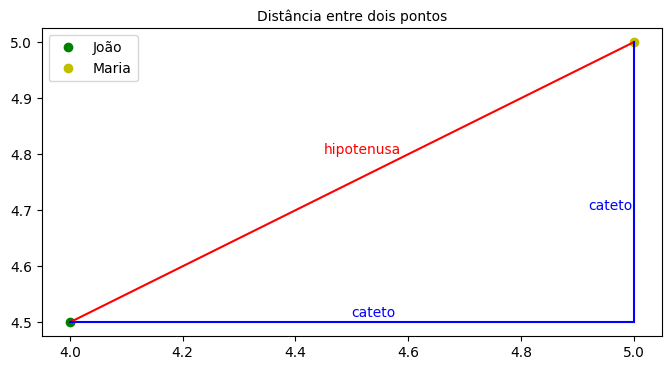

In [17]:
# joao = [4, 4.5]
# maria = [5, 5]

plt.figure(figsize=(8, 4))
plt.title("Distância entre dois pontos", fontsize=10, pad=5)

# pontos
plt.plot(4, 4.5, "go")
plt.plot(5, 5, "yo")

# triângulo
plt.plot([4, 5], [4.5, 5], linestyle='-', color='r')
plt.plot([4, 5], [4.5, 4.5], linestyle='-', color='b')
plt.plot([5, 5], [4.5, 5], linestyle='-', color='b')

# Anotação
plt.annotate('hipotenusa', (4.45, 4.8), color='r')
plt.annotate('cateto', (4.5, 4.51), color='b')
plt.annotate('cateto', (4.92, 4.7), color='b')

# legenda
plt.legend(['João', 'Maria'])

In [18]:
joao = np.array([4, 4.5])
maria = np.array([5, 5])

joao - maria

array([-1. , -0.5])

In [19]:
# Aplicando a formula de pitágoras
def distancia(pt1, pt2):
    cateto1, cateto2 = pt1 - pt2
    return sqrt((cateto1 * cateto1) + (cateto2 * cateto2))

distancia(joao, maria)

1.118033988749895

In [20]:
# Utilizando o método numpy - np.linalg.norm
def distancia(pt1, pt2):
    return np.linalg.norm(pt1 - pt2)

distancia(joao, maria)

1.118033988749895

##### Distância entre as notas de dois usuários

In [21]:
def notas_do_usuario(usuario_id1, usuario_id2, qt_minima):
    # Cria df contendo as notas, com o FilmeID como índice
    notas_usuario_1 = df_ratings.loc[usuario_id1].set_index('FilmeID')[['Nota']]
    notas_usuario_2 = df_ratings.loc[usuario_id2].set_index('FilmeID')[['Nota']]

    # Concatena os dois dfs, onde a chave (FilmeID) for igual
    notas_usuarios = notas_usuario_1.join(notas_usuario_2, lsuffix=f'_usuario_{usuario_id1}', rsuffix=f'_usuario_{usuario_id2}', how='inner')

    # Calcula as distâncias
    return None if len(notas_usuarios) <= qt_minima else distancia(notas_usuarios[f'Nota_usuario_{usuario_id1}'], notas_usuarios[f'Nota_usuario_{usuario_id2}'])

qt_minima = 3    

print(f'Quantidade mínima de filmes assistidos em comum deve ser de mais de {qt_minima}')
print(f'Distância entre o usuário 1 e 4   - {notas_do_usuario(1, 4, qt_minima)}')
print(f'Distância entre o usuário 1 e 175 - {notas_do_usuario(1, 175, qt_minima)}   - (obs - não assistiram filmes em comum)')

Quantidade mínima de filmes assistidos em comum deve ser de mais de 3
Distância entre o usuário 1 e 4   - 11.135528725660043
Distância entre o usuário 1 e 175 - None   - (obs - não assistiram filmes em comum)


##### Distância entre um usuário e todos os outros
Encontraremos a a similaridade entre os usuários, quanto menor a distância mais similar é.

In [22]:
def distancia_todos_usuarios(usuario_analisado):
    todos_usuarios = df_ratings.index.unique()
    
    df_distancias = pd.DataFrame([(usuario_analisado, usuario_id, notas_do_usuario(usuario_analisado, usuario_id, qt_minima))  for usuario_id in todos_usuarios], columns=['Usuario_Analisado', 'Outro_Usuario', 'Distância'])
    df_distancias = df_distancias.dropna().sort_values('Distância')
    df_distancias = df_distancias.set_index('Outro_Usuario').drop(usuario_analisado, errors='ignore')

    return df_distancias

In [23]:
usuario_analisado = 1

df_distancias = distancia_todos_usuarios(usuario_analisado)

df_distancias.head(10)

,Usuario_Analisado,Distância
Outro_Usuario,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
90,1,1.000000
49,1,1.000000
53,1,1.000000
9,1,1.000000
258,1,1.000000
523,1,1.000000


##### Recomendando os filme do usuário mais próximo e que ainda não foram assistidos, para o usuário analisado

In [24]:
def recomendacoes_filmes(usuario_analisado, usuario_proximo):
    print(f'Recomendações para o usuário {usuario_analisado} baseados nos filmes do usuário {usuario_proximo}', end='\n\n')
    notas_usuario_1 = df_ratings.loc[usuario_analisado].set_index('FilmeID')[['Nota']]
    notas_usuario_2 = df_ratings.loc[usuario_proximo].set_index('FilmeID')[['Nota']]

    # Concatena os dois dfs, onde a chave (FilmeID) mantendo o df esquerdo (do usuário mais próximo)
    notas_usuarios = notas_usuario_2.join(notas_usuario_1, lsuffix=f'_usuario_{usuario_proximo}', rsuffix=f'_usuario_{usuario_analisado}', how='left')

    # Exclui linha onde o filme já foi assistido pelo usuário analisado
    notas_usuarios = notas_usuarios[notas_usuarios.Nota_usuario_1.isnull()][[f'Nota_usuario_{usuario_proximo}']]

    # Ordena por maior nota
    notas_usuarios.sort_values(f'Nota_usuario_{usuario_proximo}', ascending=False, inplace=True)

    return notas_usuarios.join(df_movies)

In [25]:
lista_filmes = recomendacoes_filmes(usuario_analisado, df_distancias.index[0])
lista_filmes.head(10)

Recomendações para o usuário 1 baseados nos filmes do usuário 77



,Nota_usuario_77,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984
5378,5.0,Star Wars: Episode II - Attack of the Clones (...,Action|Adventure|Sci-Fi|IMAX,92.0,3.157609
8961,5.0,"Incredibles, The (2004)",Action|Adventure|Animation|Children|Comedy,125.0,3.836000
5816,5.0,Harry Potter and the Chamber of Secrets (2002),Adventure|Fantasy,102.0,3.598039
5952,5.0,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277


##### Recomendando os filmes dos N usuários mais próximo e que ainda não foram assistidos, para o usuário analisado
A nota do filme será a média das notas dos usuários mais próximos

In [26]:
def recomendacoes_filmes_n_proximos(usuario_analisado, n_usuarios_proximo):
    print(f'Recomendações para o usuário {usuario_analisado} baseados nos filmes dos {n_usuarios_proximo} usuário mais próximos', end='\n\n')

    # Calcula as distâncias entre o usuário_analisado e todos os outros usuários
    df_distancias = distancia_todos_usuarios(usuario_analisado)

    # Cria DataFrame com as notas do usuário analisado
    notas_usuario_1 = df_ratings.loc[usuario_analisado].set_index('FilmeID')[['Nota']]

    # Cria DataFrame com as notas dos n_usuarios_proximo
    usuarios_proximo = df_distancias.index[: n_usuarios_proximo]
    notas_usuario_2 = df_ratings.loc[usuarios_proximo][['FilmeID','Nota']]

    # Agrupa as notas dos filmes dos usuário mais próximos e calcula a nota mínima, máxima, média e quantidade de avaliações agrupadas
    notas_usuario_2 = notas_usuario_2.groupby('FilmeID').agg({'Nota': {'min', 'max', 'mean', 'count'}})
    notas_usuario_2.columns = [f'{tx1}_{n_usuarios_proximo}_{tx2}' for tx1, tx2 in notas_usuario_2.columns]

    # Concatena os dois dfs, onde a chave (FilmeID) mantendo o df esquerdo (do usuário mais próximo)
    notas_usuarios = notas_usuario_2.join(notas_usuario_1, how='left')

    # Exclui linha onde o filme já foi assistido pelo usuário analisado
    notas_usuarios = notas_usuarios[notas_usuarios.Nota.isnull()][[f'Nota_{n_usuarios_proximo}_min', f'Nota_{n_usuarios_proximo}_max', f'Nota_{n_usuarios_proximo}_mean', f'Nota_{n_usuarios_proximo}_count']]

    # Agrupar com arquivo de filmes
    notas_usuarios = notas_usuarios.join(df_movies, how='inner')

    # Ordena por maior nota
    notas_usuarios.sort_values([f'Nota_{n_usuarios_proximo}_count' ,f'Nota_{n_usuarios_proximo}_mean'], ascending=[False, False], inplace=True)

    return notas_usuarios

In [27]:
lista_filmes = recomendacoes_filmes_n_proximos(usuario_analisado, 300)
lista_filmes.head(10)

Recomendações para o usuário 1 baseados nos filmes dos 300 usuário mais próximos



,Nota_300_min,Nota_300_max,Nota_300_mean,Nota_300_count,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,,,,,
318,3.0,5.0,4.510067,149,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
150,2.0,5.0,4.029070,86,Apollo 13 (1995),Adventure|Drama|IMAX,201.0,3.845771
589,3.0,5.0,4.140000,75,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982
4993,0.5,5.0,4.201389,72,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
7153,1.0,5.0,4.250000,68,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
5952,0.5,5.0,4.117647,68,"Lord of the Rings: The Two Towers, The (2002)",Adventure|Fantasy,188.0,4.021277
380,2.0,5.0,3.757353,68,True Lies (1994),Action|Adventure|Comedy|Romance|Thriller,178.0,3.497191
344,1.0,5.0,3.301471,68,Ace Ventura: Pet Detective (1994),Comedy,161.0,3.040373
32,2.5,5.0,4.089552,67,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller,177.0,3.983051


##### Gerando recomendações para um usuário novo

Criando DataFrame com os filmes e notas do novo usuário

In [28]:
notas = [[122904, 2], [1246, 5], [2529, 2], [2329, 5], [2324, 5], [32, 5], [7, 0.5], [2, 2], [1196, 1], [260, 1]]
df_notas = pd.DataFrame(notas, columns=['FilmeID', 'Nota'])

df_notas

,FilmeID,Nota
0,122904,2.0
1,1246,5.0
2,2529,2.0
3,2329,5.0
4,2324,5.0
5,32,5.0
6,7,0.5
7,2,2.0
8,1196,1.0
9,260,1.0


Visualizando quais são os filmes qualificados pelo novo usuário

In [29]:
df_movies.loc[df_notas.FilmeID][['Titulo', 'Genero']]

,Titulo,Genero
FilmeID,,
122904,Deadpool (2016),Action|Adventure|Comedy|Sci-Fi
1246,Dead Poets Society (1989),Drama
2529,Planet of the Apes (1968),Action|Drama|Sci-Fi
2329,American History X (1998),Crime|Drama
2324,Life Is Beautiful (La Vita è bella) (1997),Comedy|Drama|Romance|War
32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
7,Sabrina (1995),Comedy|Romance
2,Jumanji (1995),Adventure|Children|Fantasy
1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi


Adicionando o novo usuário no DataFrame df_ratings

In [30]:
df_ratings.tail(1)

,FilmeID,Nota,Timestamp
UsuarioID,,,
610,170875,3.0,1493846415


In [31]:
def adicionar_novo_usuario(df_notas, df_ratings):
    id_novo_usuario = df_ratings.index.max() + 1

    df_notas['UsuarioID'] = id_novo_usuario
    df_notas.set_index('UsuarioID', inplace=True)

    return id_novo_usuario, pd.concat([df_ratings, df_notas])

id_novo_usuario, df_ratings = adicionar_novo_usuario(df_notas, df_ratings)

In [32]:
df_ratings.tail(11)

,FilmeID,Nota,Timestamp
UsuarioID,,,
610,170875,3.0,1.493846e+09
611,122904,2.0,NaN
611,1246,5.0,NaN
611,2529,2.0,NaN
611,2329,5.0,NaN
611,2324,5.0,NaN
611,32,5.0,NaN
611,7,0.5,NaN
611,2,2.0,NaN


In [33]:
lista_filmes = recomendacoes_filmes_n_proximos(id_novo_usuario, 30)
lista_filmes.head(10)

Recomendações para o usuário 611 baseados nos filmes dos 30 usuário mais próximos



,Nota_30_min,Nota_30_max,Nota_30_mean,Nota_30_count,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,,,,,
2571,0.5,5.0,3.982143,28,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
296,2.5,5.0,4.460000,25,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
318,1.0,5.0,4.320000,25,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
47,2.0,5.0,4.300000,25,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,203.0,3.975369
356,2.5,5.0,4.240000,25,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
2858,2.5,5.0,4.200000,25,American Beauty (1999),Drama|Romance,204.0,4.056373
2959,0.5,5.0,4.200000,25,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
4306,2.0,5.0,3.880000,25,Shrek (2001),Adventure|Animation|Children|Comedy|Fantasy|Ro...,170.0,3.867647
4993,2.0,5.0,3.937500,24,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061


In [34]:
lista_filmes = recomendacoes_filmes_n_proximos(id_novo_usuario, 500)
lista_filmes.head(10)

Recomendações para o usuário 611 baseados nos filmes dos 500 usuário mais próximos



,Nota_500_min,Nota_500_max,Nota_500_mean,Nota_500_count,Titulo,Genero,Total_de_Votos,Nota_Média
FilmeID,,,,,,,,
1210,1.0,5.0,4.228571,105,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Sci-Fi,196.0,4.137755
2571,0.5,5.0,4.201923,104,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
356,2.0,5.0,4.196078,102,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
1198,0.5,5.0,4.235000,100,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500
296,1.0,5.0,4.407216,97,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,0.5,5.0,4.262887,97,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
1270,1.5,5.0,4.057895,95,Back to the Future (1985),Adventure|Comedy|Sci-Fi,171.0,4.038012
589,1.0,5.0,4.043011,93,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982
318,1.0,5.0,4.401099,91,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
